<div style="background-image:url(images/bertinoro.jpg); padding: 10px 30px 20px 30px; background-size:cover; background-opacity:50%; border-radius:5px">
<p style="float:right; margin-top:20px; padding: 20px 20px 0px 20px; background:rgba(255,255,255,0.6); border-radius:10px;">
<img width="400px" src=images/obspy_logo_full_524x179px.png?raw=true>
</p>

<h1 style="color:#333">First TIDES Training School</h1>
<h5 style="color:#FFF">Bertinoro (FC), Italy, June 1-5 2015</h5>

<h3 style="color:#EEE">Day 1: Data Acquisition and Processing with ObsPy</h3>

<h2 style="color:#FFF">Download Station Information and Waveforms</h2>
</div>

In this notebook we will download StationXML files and MiniSEED waveforms from the INGV webservice. If this does not work for whatever reason you can find the pre-downloaded data in

`~/Desktop/data/earthquake_data/waveforms`

and

`~/Desktop/data/earthquake_data/stations`

This enables you to do the exercises following this one no matter what.

---

In [1]:
%pylab inline
from __future__ import print_function
import matplotlib.pylab as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 12, 8

Populating the interactive namespace from numpy and matplotlib


---

The first step is to initialize the ObsPy FDSN web service client.

In [2]:
from obspy.fdsn import Client

client = Client("INGV")

print(client)

FDSN Webservice Client (base url: http://webservices.rm.ingv.it)
Available Services: 'dataselect' (v1.1.0), 'event' (v1.1.13), 'station' (v1.1.0), 'available_event_catalogs', 'available_event_contributors'

Use e.g. client.help('dataselect') for the
parameter description of the individual services
or client.help() for parameter description of
all webservices.


## Step 1: Station Data

For each event we aim to download data for each of the following channels (not all of them will have data available for each event):

```
IV.BDI..BH?
IV.BOB..BH?
IV.CAVE..HH?
SI.LUSI..HH?
IV.PESA..BH?
IV.PRMA..HH?
IV.SALO..BH?
IV.TEOL..BH?
MN.VLC..HH?
```

The next cell will download one StationXML file containing information about ALL of these channels. The `get_stations_bulk()` method can be used to download information about a large amount of stations at once.

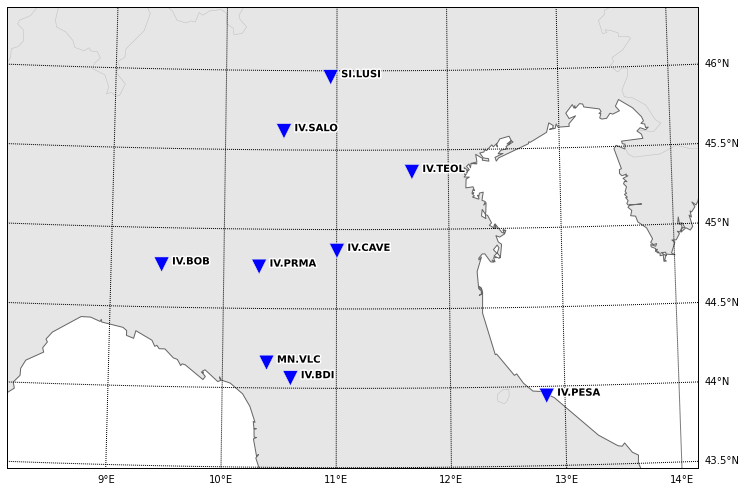

In [3]:
import obspy
import os

# Create output directory if it does not exist.
if not os.path.exists("output/stations"):
    os.makedirs("output/stations")

# Limit by earliest and latest events. It is usually a good
# idea to download station information for a wider time range
# as needed.
starttime = obspy.UTCDateTime(2011, 12, 1)
endtime = obspy.UTCDateTime(2015, 5, 1)
stations = [
    ("IV", "BDI", "", "BH?", starttime, endtime),
    ("IV", "BOB", "", "BH?", starttime, endtime),
    ("IV", "CAVE", "", "HH?", starttime, endtime),
    ("SI", "LUSI", "", "HH?", starttime, endtime),
    ("IV", "PESA", "", "BH?", starttime, endtime),
    ("IV", "PRMA", "", "HH?", starttime, endtime),
    ("IV", "SALO", "", "BH?", starttime, endtime),
    ("IV", "TEOL", "", "BH?", starttime, endtime),
    ("MN", "VLC", "", "HH?", starttime, endtime)]

# Get it all and plot it.
filename = "output/stations/all_stations.xml"
client.get_stations_bulk(stations, level="response",
                         filename=filename)
obspy.read_inventory(filename).plot(projection="local", resolution="i");

### Exercise: Download station information per station

**For all of the above channels, download station information per channel.**

```python
inv = client.get_stations(network="NET", station="STA", location="LOC",
                          channel="CHA", starttime=stime, endtime=etime,
                          level="response")
inv.write(filename, format="stationxml")
```

Please note that you can also download it directly to a file by passing
a `filename` argument:

```python
client.get_stations(network="NET", station="STA", location="LOC",
                    channel="CHA", starttime=stime, endtime=etime,
                    level="response", filename=filename)
```

Save it in the `output/stations` folder.

In [4]:
starttime = obspy.UTCDateTime(2011, 12, 1)
endtime = obspy.UTCDateTime(2015, 5, 1)
stations = [
    ("IV", "BDI", "", "BH?"),
    ("IV", "BOB", "", "BH?"),
    ("IV", "CAVE", "", "HH?"),
    ("SI", "LUSI", "", "HH?"),
    ("IV", "PESA", "", "BH?"),
    ("IV", "PRMA", "", "HH?"),
    ("IV", "SALO", "", "BH?"),
    ("IV", "TEOL", "", "BH?"),
    ("MN", "VLC", "", "HH?")]

for net, sta, loc, cha in stations:
    client.get_stations(network=net, station=sta, location=loc, channel=cha,
                        starttime=starttime, endtime=endtime, level="response",
                        filename="output/stations/%s_%s.xml" % (net, sta))

In [5]:
ls -l output/stations/

total 3152
-rw-r--r--@ 1 lion  staff    81760 May 27 12:41 IV_BDI.xml
-rw-r--r--@ 1 lion  staff    81748 May 27 12:41 IV_BOB.xml
-rw-r--r--@ 1 lion  staff    31514 May 27 12:41 IV_CAVE.xml
-rw-r--r--@ 1 lion  staff    46849 May 27 12:41 IV_PESA.xml
-rw-r--r--@ 1 lion  staff    31529 May 27 12:41 IV_PRMA.xml
-rw-r--r--@ 1 lion  staff    82741 May 27 12:41 IV_SALO.xml
-rw-r--r--@ 1 lion  staff    47826 May 27 12:41 IV_TEOL.xml
-rw-r--r--@ 1 lion  staff   154569 May 27 12:41 MN_VLC.xml
-rw-r--r--@ 1 lion  staff     8642 May 27 12:41 SI_LUSI.xml
-rw-r--r--@ 1 lion  staff  1028182 May 27 12:41 all_stations.xml


## Step 2: Download Data

The next step is to download waveform information per event. We will now do it for one event only, as otherwise the network would be hit too hard. Data for all other events can be found at

`~/Desktop/data/earthquake_data/waveforms`

### Exercise: Download waveform data

The purpose of this exercise is to download waveform data for the event stored in

```
data/GCMT_2014_04_01__Mw_8_1.xml
```

for all previously mentioned stations and channels. Please download from 5 minutes before the event origin to 1 hour after it.

Please note that this interacts with an external service thus it might fail for various reasons. A good construct to use it

```python
try:
    st = c.get_waveforms(network=net, station=sta, location=loc,
                         channel=cha, starttime=stime, endtime=etime)
    print("Sucessfully downloaded %s.%s!" % (net, sta))
except Exception as e:
    print("Failed to download %s.%s due to: %s" % (net, sta, str(e)))
```

Thus your tasks consists of two steps:

1. Get the event origin time from the mentioned QuakeML file.
2. Download waveform data. Store it in the `output/waveforms` folder. 

In [6]:
import os

# Create output directory if it does not exist.
if not os.path.exists("output/waveforms"):
    os.makedirs("output/waveforms")

In [7]:
import obspy

event = obspy.readEvents("./data/GCMT_2014_04_01__Mw_8_1.xml")[0]
origin = event.preferred_origin() or event.origins[0]
origin_time = origin.time
print(origin_time)

2014-04-01T23:47:31.500000Z


In [8]:
for net, sta, loc, cha in stations:
    try:
        client.get_waveforms(network=net, station=sta, location=loc, channel=cha,
                            starttime=origin_time - 300, endtime=origin_time + 3600,
                            filename="output/waveforms/%s_%s.mseed" % (net, sta))
        print("Sucessfully downloaded %s.%s!" % (net, sta))
    except Exception as e:
        print("Failed to download %s.%s due to: %s" % (net, sta, str(e)))

Sucessfully downloaded IV.BDI!
Sucessfully downloaded IV.BOB!
Sucessfully downloaded IV.CAVE!
Sucessfully downloaded SI.LUSI!
Sucessfully downloaded IV.PESA!
Sucessfully downloaded IV.PRMA!
Sucessfully downloaded IV.SALO!
Failed to download IV.TEOL due to: No data available for request.
Sucessfully downloaded MN.VLC!


In [9]:
ls -l output/waveforms/

total 16496
-rw-r--r--@ 1 lion  staff   346624 May 27 12:41 IV_BDI.mseed
-rw-r--r--@ 1 lion  staff   388608 May 27 12:41 IV_BOB.mseed
-rw-r--r--@ 1 lion  staff  1594880 May 27 12:41 IV_CAVE.mseed
-rw-r--r--@ 1 lion  staff   494592 May 27 12:41 IV_PESA.mseed
-rw-r--r--@ 1 lion  staff  2437632 May 27 12:41 IV_PRMA.mseed
-rw-r--r--@ 1 lion  staff   322560 May 27 12:41 IV_SALO.mseed
-rw-r--r--@ 1 lion  staff  1686528 May 27 12:41 MN_VLC.mseed
-rw-r--r--@ 1 lion  staff  1162240 May 27 12:41 SI_LUSI.mseed
